__Notebook Description:__

Notebook for checking sensitivity of 10 Jan case: 23:40 UTC and 28 Jan case: 23:30 UTC to launch times. Original launch times were  23:40 UTC and 23:30 UTC respectively. However, HYSPLIT back trajectory run was initialized on 23:15 UTC for both of the cases.


# Imports

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset
from netCDF4 import date2index
from datetime import datetime

%matplotlib inline

In [2]:
path1 = '/home/ollie/muali/Data/winter_all/'
path2 = '/home/ollie/muali/data_work/back_traj/Sounding/jan/single_events/'

# 10 Jan case

/home/ollie/muali/miniconda3/envs/work_env_basemap/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.


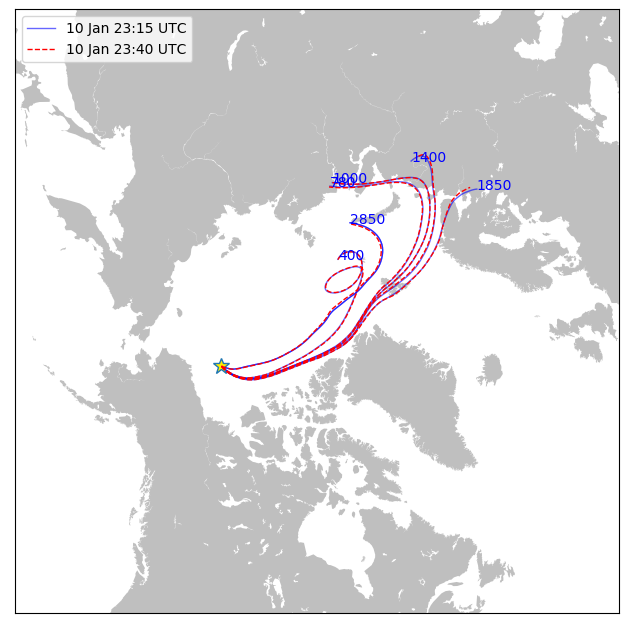

In [24]:
# path to all trajectory files

dates = datetime(1998,1,10,23,15)
levels= ['400', '780', '1000', '1400', '1850', '2850']
date_str = '{:%m_%d_%H_%M}'.format(dates)

# plotting trajectories
fig = plt.figure(figsize=(8,8), dpi=100)

m = Basemap(projection='npstere',boundinglat=50,lon_0=270,resolution='l')    

m.fillcontinents(color='0.75')

for lvl in levels:
    df = pd.read_csv(path2+ lvl + '/tdump_'+lvl+'_'+date_str, skiprows=7, header=None, delim_whitespace=True)

#taking lat lons of the trajectories to be plotted
    lat = np.array(df.iloc[:, 9].copy())
    lon = np.array(df.iloc[:, 10].copy())

#Convert lat lon to map coordinates
    x, y = m(lon, lat)

#Plot the points on the map
    plt.plot(x, y,linewidth=1.0, color='blue', alpha=0.6)
    if lvl is levels[-1]:
        plt.plot(x, y, linewidth=1.0, color='blue', alpha=0.6, label='10 Jan 23:15 UTC')

#source point
    xpt, ypt = m(lon[-1], lat[-1])
    plt.text(xpt,ypt,lvl, fontsize=10, color='blue')
      
    #SHEBA point
x_s, y_s = m(lon[0], lat[0])
plt.plot(x_s, y_s, marker = '*', markerfacecolor='#ffed00', linewidth=0, markersize=12)
    
## plotting ensemble trajectories ##
dates2 = datetime(1998,1,10,23,40)
date_str = '{:%m_%d_%H_%M}'.format(dates2)
for lvl in levels:

    #file_name = '/home/ollie/muali/data_work/back_traj/Sounding/ensemble/jan/1850/tdump_1850_01_04_23'
    df2 = pd.read_csv(path2 + lvl + '/tdump_'+lvl+'_'+date_str, skiprows=7, header=None, delim_whitespace=True) 
    
    # lat1 is ensemble lats, lat2 is single traj lats
    lat_mean = np.array(df2.iloc[:, 9].copy())
    lon_mean = np.array(df2.iloc[:, 10].copy())

    x_mean, y_mean = m(lon_mean, lat_mean)

    
    if lvl is levels[-1]:
        plt.plot(x_mean, y_mean, '--', linewidth=1.0, color='red', label='10 Jan 23:40 UTC')
    else:
        plt.plot(x_mean, y_mean, '--', linewidth=1.0, color='red')
    
    #plt.text(x_mean[0], y_mean[0], lvl, fontsize=10, color='red')
    
plt.legend(loc='upper left');
#plt.title('Ensemble mean vs single member for 1850m');
        

# 28 Jan Case

/home/ollie/muali/miniconda3/envs/work_env_basemap/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


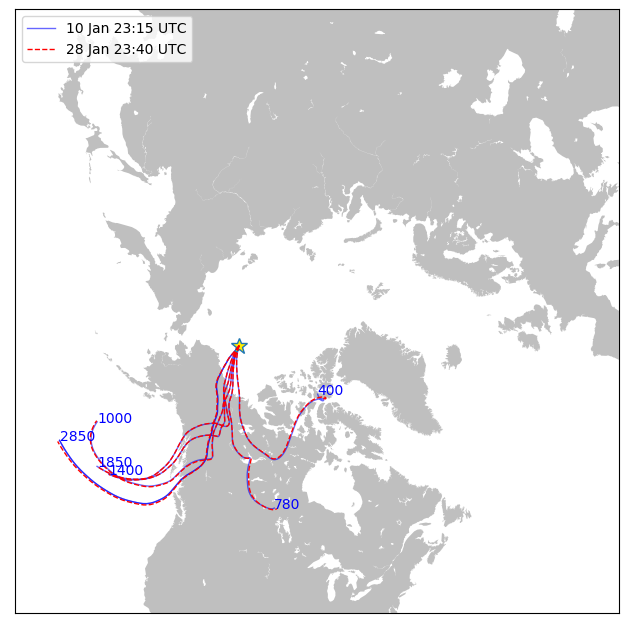

In [21]:
# path to all trajectory files

dates = datetime(1998,1,28,23)
levels= ['400', '780', '1000', '1400', '1850', '2850']
date_str = '{:%m_%d_%H}'.format(dates)

# plotting trajectories
fig = plt.figure(figsize=(8,8), dpi=100)

m = Basemap(projection='npstere',boundinglat=40,lon_0=270, #lat_0=90, 
            resolution='l')    

m.fillcontinents(color='0.75')

for lvl in levels:
    df = pd.read_csv(path1+'tdump_'+lvl+'_'+date_str, skiprows=7, header=None, delim_whitespace=True)

#taking lat lons of the trajectories to be plotted
    lat = np.array(df.iloc[:, 9].copy())
    lon = np.array(df.iloc[:, 10].copy())

#Convert lat lon to map coordinates
    x, y = m(lon, lat)

#Plot the points on the map
    plt.plot(x, y,linewidth=1.0, color='blue', alpha=0.6)
    if lvl is levels[-1]:
        plt.plot(x, y, linewidth=1.0, color='blue', alpha=0.6, label='10 Jan 23:15 UTC')

#source point
    xpt, ypt = m(lon[-1], lat[-1])
    plt.text(xpt,ypt,lvl, fontsize=10, color='blue')
      
#SHEBA point
x_s, y_s = m(lon[0], lat[0])
plt.plot(x_s, y_s, marker = '*', markerfacecolor='#ffed00', linewidth=0, markersize=12)
    
## plotting ensemble trajectories ##

for lvl in levels:

    #file_name = '/home/ollie/muali/data_work/back_traj/Sounding/ensemble/jan/1850/tdump_1850_01_04_23'
    df2 = pd.read_csv(path2 + lvl + '/tdump_'+lvl+'_'+date_str, skiprows=7, header=None, delim_whitespace=True) 
    
    # lat1 is ensemble lats, lat2 is single traj lats
    lat_mean = np.array(df2.iloc[:, 9].copy())
    lon_mean = np.array(df2.iloc[:, 10].copy())

    x_mean, y_mean = m(lon_mean, lat_mean)

    
    if lvl is levels[-1]:
        plt.plot(x_mean, y_mean, '--', linewidth=1.0, color='red', label='28 Jan 23:40 UTC')
    else:
        plt.plot(x_mean, y_mean, '--', linewidth=1.0, color='red')
    

plt.legend(loc='upper left');
       

# Observations

Basically for both the cases depicted above the **trajectories are not super sensitive to start time.** So, we can justify our starting times of HYSPLIT model.

I have high resolution copy of these plots at `/home/mali/Documents/MSc_Thesis/Plots/checking_sensitivity_for_launch_times/` which can be included either in Supplimentary info or in an extended Methods section now that we will have a higher word limit.